In [3]:
# Import skimage modules
from skimage import data, img_as_float
from skimage import exposure
from skimage.io import imread, imsave, imshow, imread_collection, concatenate_images, imhist
# Lets try augmenting a cifar10 image using these techniques
from skimage import data, img_as_float
from skimage import exposure

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from skimage import data, img_as_float
from skimage import exposure

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='blue')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image from cifar10 dataset
img = imread('/Users/wajdiahmed/Kaggle/TCGA Data/TCGA-AY-A8YK-01A-01-TS1/images/TCGA-AY-A8YK-01A-01-TS1.png')[:,:,:3]

# Set font size for images
matplotlib.rcParams['font.size'] = 8



ImportError: cannot import name 'imhist'

/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


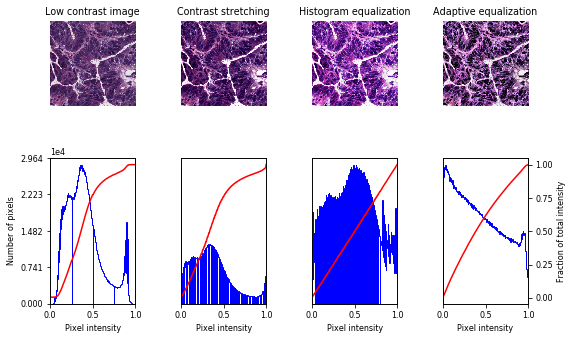

In [2]:
# Load an example image


# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [1]:
from scipy import misc
import numpy as np
from scipy import ndimage

In [3]:
path = '/Users/wajdiahmed/Kaggle/TCGA Data/TCGA-AY-A8YK-01A-01-TS1/images/TCGA-AY-A8YK-01A-01-TS1.png'

In [7]:
image = misc.imread(path, mode="L")

/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [10]:
# 1. Get the histogram of the image
hist, bin_edges = np.histogram(image, bins='auto')
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

In [12]:
# 2. Get the min, max, mean, value of the image
im_min = image.min()
im_max = image.max()
im_mean = image.mean()

print('Min : ', im_min)
print('Max : ', im_max)
print('Mean : ', im_mean)




Min :  14
Max :  243
Mean :  86.990965


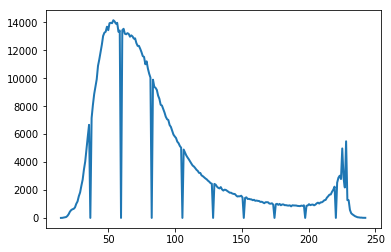

In [16]:
# 3. Plot the histgram
import matplotlib.pyplot as plt
plt.plot(bin_centers, hist, lw=2)
plt.show()



In [17]:
import cv2
import numpy as np

img = cv2.imread('/Users/wajdiahmed/Kaggle/TCGA Data/TCGA-AY-A8YK-01A-01-TS1/images/TCGA-AY-A8YK-01A-01-TS1.png',0)


# Take each frame
cv2.imshow('Original',img)
edges = cv2.Canny(img,100,200)
cv2.imshow('Edges',edges)


    

